In [78]:
import mask
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from field_importer import get_field
import xarray as xr
import matplotlib.animation as animation
from IPython import display
from scipy.ndimage import gaussian_filter1d as gf
import os

%config Completer.use_jedi = False

# Read in ice age data

In [79]:
age_lr_dir = '/media/robbie/TOSHIBA EXT/OSISAF_age'

age_file_list = sorted(os.listdir(age_lr_dir))

print(age_file_list)

['ice_type_nh_polstere-100_multi_202012011200.nc', 'ice_type_nh_polstere-100_multi_202012021200.nc', 'ice_type_nh_polstere-100_multi_202012031200.nc', 'ice_type_nh_polstere-100_multi_202012041200.nc', 'ice_type_nh_polstere-100_multi_202012051200.nc', 'ice_type_nh_polstere-100_multi_202012061200.nc', 'ice_type_nh_polstere-100_multi_202012071200.nc', 'ice_type_nh_polstere-100_multi_202012081200.nc', 'ice_type_nh_polstere-100_multi_202012091200.nc', 'ice_type_nh_polstere-100_multi_202012101200.nc', 'ice_type_nh_polstere-100_multi_202012111200.nc', 'ice_type_nh_polstere-100_multi_202012121200.nc', 'ice_type_nh_polstere-100_multi_202012131200.nc', 'ice_type_nh_polstere-100_multi_202012141200.nc', 'ice_type_nh_polstere-100_multi_202012151200.nc', 'ice_type_nh_polstere-100_multi_202012161200.nc', 'ice_type_nh_polstere-100_multi_202012171200.nc', 'ice_type_nh_polstere-100_multi_202012181200.nc', 'ice_type_nh_polstere-100_multi_202012191200.nc', 'ice_type_nh_polstere-100_multi_202012201200.nc',

In [80]:
ad = Dataset('/media/robbie/TOSHIBA EXT/OSISAF_age/ice_type_nh_polstere-100_multi_202101231200.nc')
alons, alats = np.array(ad['lon']), np.array(ad['lat'])

age_big = np.zeros((len(age_file_list),alon.shape[0],alon.shape[1]))
age_times = np.zeros(len(age_file_list))

times = np.zeros(len(age_file_list))
for i, file in enumerate(age_file_list):
    with Dataset(f'{age_lr_dir}/{file}') as mdata:

        ice_type = np.array(mdata['ice_type'][0])
        age_times[i] = int(mdata['time'][0])
        age_big[i] = ice_type
        
age_dates = [(dt0 + datetime.timedelta(seconds = secs)).date() for secs in age_times]


# Read in ice motion vectors

In [93]:
imv_lr_dir = '/media/robbie/TOSHIBA EXT/merged'

file_list = sorted(os.listdir(imv_lr_dir))

print(file_list)

['ice_drift_nh_polstere-625_multi-oi_202011291200-202012011200.nc', 'ice_drift_nh_polstere-625_multi-oi_202011301200-202012021200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012011200-202012031200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012021200-202012041200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012031200-202012051200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012041200-202012061200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012051200-202012071200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012061200-202012081200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012071200-202012091200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012081200-202012101200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012091200-202012111200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012101200-202012121200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012111200-202012131200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012121200-202012141200.nc', 'ice_drift_nh_polstere-625_multi-oi_202012131200-202012151200

In [94]:
d = Dataset(f'{imv_lr_dir}/{file_list[-1]}')
lons = np.array(d['lon'])
lats = np.array(d['lat'])
xc = np.array(d['xc'])
yc = np.array(d['yc'])
X, Y = np.meshgrid(xc,yc)

In [102]:
IMV_big = np.zeros((2,len(file_list),177,119))
times = np.zeros(len(file_list))
for i, file in enumerate(file_list):
    with Dataset(f'{imv_lr_dir}/{file}') as mdata:
        
#         print(mdata['dX'].shape)
        
        IMV_big[0][i] = np.array(mdata['dX'][0])
        IMV_big[1][i] = np.array(mdata['dY'][0])
        time = int(mdata['time'][0])
        times[i] = time
    
        
        
    
    
# print(times)

dt0 = datetime.datetime(year=1978,month=1,day=1)
dates = [(dt0 + datetime.timedelta(seconds = secs)).date() for secs in times]

# print(dates)

In [103]:
def get_ind_from_date(date,dates):
    ind = dates.index(date)
    return(ind)
print(dates)
get_ind_from_date(datetime.date(year=2021,month=2,day=3),dates)

[datetime.date(2020, 12, 1), datetime.date(2020, 12, 2), datetime.date(2020, 12, 3), datetime.date(2020, 12, 4), datetime.date(2020, 12, 5), datetime.date(2020, 12, 6), datetime.date(2020, 12, 7), datetime.date(2020, 12, 8), datetime.date(2020, 12, 9), datetime.date(2020, 12, 10), datetime.date(2020, 12, 11), datetime.date(2020, 12, 12), datetime.date(2020, 12, 13), datetime.date(2020, 12, 14), datetime.date(2020, 12, 15), datetime.date(2020, 12, 16), datetime.date(2020, 12, 17), datetime.date(2020, 12, 18), datetime.date(2020, 12, 19), datetime.date(2020, 12, 20), datetime.date(2020, 12, 21), datetime.date(2020, 12, 22), datetime.date(2020, 12, 23), datetime.date(2020, 12, 24), datetime.date(2020, 12, 25), datetime.date(2020, 12, 26), datetime.date(2020, 12, 27), datetime.date(2020, 12, 28), datetime.date(2020, 12, 29), datetime.date(2020, 12, 30), datetime.date(2020, 12, 31), datetime.date(2021, 1, 1), datetime.date(2021, 1, 2), datetime.date(2021, 1, 3), datetime.date(2021, 1, 4), d

64

In [104]:
def mask_large_vals(array,threshold=10):
    
    array = np.ma.masked_where(np.abs(array) > threshold, array)
    
    array = np.ma.filled(array.astype(float), np.nan)
    
    return array

In [105]:

def transform(angle_deg, u, v):
    rad_45 = np.radians(angle_deg)
    u = u*np.cos(rad_45) - v*np.sin(rad_45)
    v = v*np.cos(rad_45) + u*np.sin(rad_45)
    return(u,v)

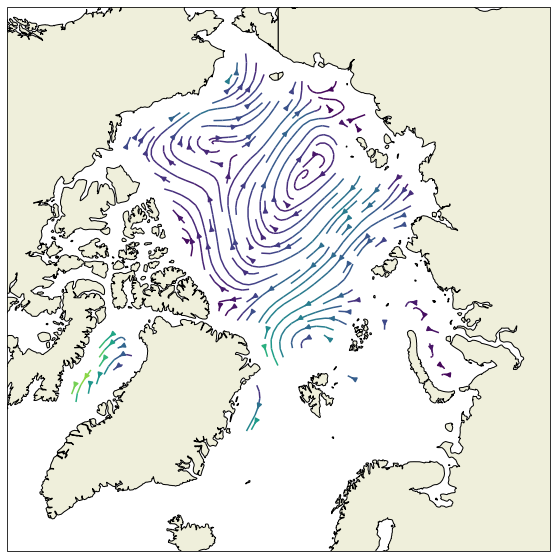

In [106]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.NorthPolarStereo())
# ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())    

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
ax.margins()

s = 2
scale = 500
size_lim = 1000
ind =  get_ind_from_date(datetime.date(year=2021,month=2,day=12),dates)

u = IMV_big[0][ind:ind+4]
v = IMV_big[1][ind:ind+4]

u = np.nanmean(u,axis=0)
v = np.nanmean(v,axis=0)
stream_density=2

u = mask_large_vals(u,threshold=size_lim)
v = mask_large_vals(v,threshold=size_lim)

u = np.ma.masked_where(np.isnan(u), u)
v = np.ma.masked_where(np.isnan(v), v)
np.ma.set_fill_value(u, np.nan)
np.ma.set_fill_value(v, np.nan)
    
# u,v = transform(-45,u,v)

speed = np.sqrt(u**2 + v**2)

qv =   ax.streamplot(x=X*1000,
                 y=Y*1000,
                 u=u,
                 v=v,
                 color=speed,
                 transform=ccrs.NorthPolarStereo(central_longitude=-45,true_scale_latitude=70),
                 density=stream_density,
                 minlength=0.005,
#                  scale=scale,
                )

# qv.set_UVC(U=u,V=v)
# plt.colorbar(qv.lines)
plt.show()

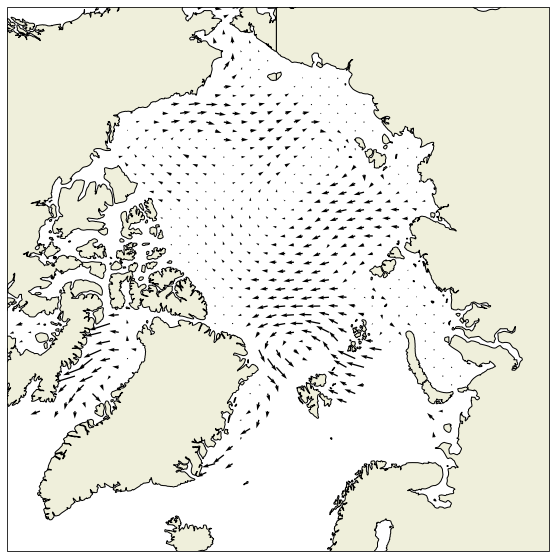

In [107]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=70))
ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())    

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
ax.margins()

s = 2
scale = 500
size_lim = 1000

ind =  get_ind_from_date(datetime.date(year=2021,month=2,day=12),dates)

u = IMV_big[0][ind:ind+4]
v = IMV_big[1][ind:ind+4]

u = np.nanmean(u,axis=0)
v = np.nanmean(v,axis=0)

u = mask_large_vals(u,threshold=size_lim)
v = mask_large_vals(v,threshold=size_lim)

u = np.ma.masked_where(np.isnan(u), u)
v = np.ma.masked_where(np.isnan(v), v)
    
u,v = transform(-45,u,v)

qv =   ax.quiver(lons[::s,::s],
                 lats[::s,::s],
                 u[::s,::s],
                 v[::s,::s],
                 transform=ccrs.PlateCarree(),
                 scale=scale,
                )

qv.set_UVC(u[::s,::s],v[::s,::s])

plt.show()

In [110]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=70))
ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())    

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
ax.margins()

s = 2
scale = 500
size_lim = 1000

bg = ax.pcolormesh(alons, 
                   alats, 
                   age_big[0,:-1,:-1], 
                    vmin = 0, 
                    vmax = 3,
                    transform=ccrs.PlateCarree(),
                    cmap='plasma',
                    alpha=0.5)


qv =   ax.quiver(lons[::s,::s],
                 lats[::s,::s],
                 IMV_big[0][0][::s,::s],
                 IMV_big[1][0][::s,::s],
                 transform=ccrs.PlateCarree(),
                 scale=scale,
                )

    
ann = ax.annotate('',
                  xy=(0.05,0.9),
                  xycoords='axes fraction',
                  fontsize=25,
                  ha='left')

ann.set_animated(True)

########################################################

IMV_gf = gf(IMV_big,1,axis=1)
# IMV_gf = IMV_big
def animate(frame):
    
    if frame % 10 == 0: #Track progress
        print(frame)

    day = frame
    
    ann.set_text(f'{dates[frame]}')

    u = IMV_gf[0][frame]
    v = IMV_gf[1][frame]
    
    u = mask_large_vals(u,threshold=size_lim)
    v = mask_large_vals(v,threshold=size_lim)
    
    u = np.ma.masked_where(np.isnan(u), u)[::s,::s]
    v = np.ma.masked_where(np.isnan(v), v)[::s,::s]
    
    u,v = transform(-45,u,v)
    
    qv.set_UVC(u,v)
    
    bg.set_array(age_big[frame,:-1,:-1].ravel())


#######################################################

ani = animation.FuncAnimation(fig,
                              animate,
                             frames= range(0,len(file_list)),
#                              frames= range(0,3),
                             )    

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

0
0
10
20
30
40
50
60
70
80


In [ ]:
Writer = animation.writers['ffmpeg']

writer = Writer(fps=3, metadata=dict(artist='Robbie Mallett CPOM UCL'))

ani.save('/home/robbie/Dropbox/beaufort_sea/IMV_quiver_with_types.mp4', writer=writer)

In [ ]:
hemisphere = 'n'

fig = plt.figure(figsize=(10,10))

if hemisphere == 'n':
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())    
else:  
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax.margins()

s = 2
scale = 500
size_lim = 1000

# bg = ax.pcolormesh(alons, 
#                    alats, 
#                    adata['age_of_sea_ice'][0,:-1,:-1], 
#                     vmin = 0, 
#                     vmax = 3,
#                     transform=ccrs.PlateCarree(),
#                     cmap='plasma',
#                     alpha=0.5)


qv =   ax.streamplot(lons[::s,::s],
                 lats[::s,::s],
                 IMV_big[0][0][::s,::s],
                 IMV_big[1][0][::s,::s],
                 transform=ccrs.PlateCarree(),
                 linewidth=2,density=2,
                )

    
ann = ax.annotate('',
                  xy=(0.05,0.9),
                  xycoords='axes fraction',
                  fontsize=25,
                  ha='left')

ann.set_animated(True)
    
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

########################################################

IMV_gf = gf(IMV_big,1,axis=1)

def animate(frame):
    
    if frame % 10 == 0: #Track progress
        print(frame)

    day = frame
    
    ann.set_text(f'{dates[frame]}')

    u = IMV_gf[0][frame]
    v = IMV_gf[1][frame]
    
    u = mask_large_vals(u,threshold=size_lim)
    v = mask_large_vals(v,threshold=size_lim)
    
    u = np.ma.masked_where(np.isnan(u), u)[::s,::s]
    v = np.ma.masked_where(np.isnan(v), v)[::s,::s]
    
    rad_45 = np.radians(-45)
    u = u*np.cos(rad_45) - v*np.sin(rad_45)
    v = v*np.cos(rad_45) + u*np.sin(rad_45)

    
    qv.set_UVC(u,v)
    
#     bg.set_array(adata['age_of_sea_ice'][start_day_of_year+day-1,:-1,:-1].ravel())


#######################################################

ani = animation.FuncAnimation(fig,
                              animate,
                             frames= range(0,len(file_list)),
#                              frames= range(0,5),
                             )    

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [115]:
import pickle

In [119]:
dd = {'lon':alons,
      'lat':alats,
      'dat':age_big[-1]}

pickle.dump(dd,open('/home/robbie/Dropbox/beaufort_sea/temporary_files/IT_20_2_21.p','wb'))

In [120]:
dd = {'lon':alons,
      'lat':alats,
      'dat':age_big[0]}

pickle.dump(dd,open('/home/robbie/Dropbox/beaufort_sea/temporary_files/IT_1_12_20.p','wb'))

In [ ]:
def qplot(lon,
          lat,
          data_u,
          data_v,
          bounding_lat=65,
          land=True,
          gridlines=True,
          figsize=[10,5],
          color_scale=(None,None),
          color_scheme='plasma',
          scale=100):
    
    """
    Plots a north polar plot using cartopy. \
    Must be supplied with gridded arrays of lon, lat and data
    """

    
    # Make figure template

    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.NorthPolarStereo())

    
    if land == True: # Superimposes a land mask
        ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

    # Set the extent of the plot, using the latitudinal limit given in the function arguments    
    
    ax.set_extent([-180, 180, 90, 70], ccrs.PlateCarree())
    
#     if gridlines == True:
#         ax.gridlines()
        
#     vmin, vmax = color_scale[0], color_scale[1]
    
    ax.quiver(lon, lat, data_u, data_v,
              transform=ccrs.PlateCarree(),
              scale=scale,
             )
    
    plt.show()
    
year = 2011 

d = Dataset(f'/home/robbie/Dropbox/Data/IMV/icemotion_daily_nh_25km_{year}0101_{year}1231_v4.1.nc')

sow_u = np.nanmean(d['u'][95:100],axis=0)
sow_v = np.nanmean(d['v'][95:100],axis=0)


IMV_field_u = mask_large_vals(sow_u,threshold=1000)
IMV_field_v = mask_large_vals(sow_v,threshold=1000)

# IMV_field_u = sam_mask(IMV_field_u,min_lat=80,max_lat=82)
# IMV_field_v = sam_mask(IMV_field_v,min_lat=80,max_lat=82)

IMV_field_N = -IMV_field_u * np.sin(np.radians(lon_grid)) + IMV_field_v * np.cos(np.radians(lon_grid))

# IMV_field_u.shape

skipper = 5

qplot(lon_grid[::skipper,::skipper],lat_grid[::skipper,::skipper],
      IMV_field_u[::skipper,::skipper],IMV_field_v[::skipper,::skipper],scale=50)

